In [42]:
import torch
import matplotlib.pyplot as plt
import pyvista as pv
import json
import pandas as pd
# pd.options.display.float_format = '{:,.2f}'.format
import glob 
pv.set_jupyter_backend('static')

OFFSET=0
RESULTS = "./results_gen/"


In [43]:
def plot_pcs(ref_pcs, sample_pcs):
    pl = pv.Plotter(shape=(2,10), window_size=[2000, 400],border=False,polygon_smoothing=True)

    for col in range(10):
        points = ref_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
        pl.subplot(0, col)
        actor = pl.add_points(
            points,
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            scalars=points[:, 2],
            point_size=2,
            ambient=0.2, 
            diffuse=0.8, 
            specular=0.8,
            specular_power=40, 
            smooth_shading=True
        )
        points = sample_pcs[col+OFFSET].reshape(-1, 3).detach().cpu().numpy()
        pl.subplot(1, col)
        actor = pl.add_points(
            points,
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            scalars=points[:, 2],
            point_size=2,
            ambient=0.2, 
            diffuse=0.8, 
            specular=0.8,
            specular_power=40, 
            smooth_shading=True
        )

    pl.background_color = "w"
    pl.link_views()
    pl.camera_position = "xy"
    pos = pl.camera.position
    pl.camera.position = (pos[0],pos[1]+3,pos[2])
    pl.camera.position = (3,0,0)
    pl.camera.azimuth = 45
    pl.camera.elevation = 30
    # create a top down light
    light = pv.Light(position=(0, 0, 0), positional=True,
                    cone_angle=50, exponent=20, intensity=.2)
    pl.add_light(light)
    pl.camera.zoom(1.3)
    pl.show()

In [44]:
def table_to_latex_row(dg):
    table_row = ""
    for record in dg[["1-NN-CD-acc","1-NN-EMD-acc"]].to_records(index=False):
        for idx in range(0,len(record),2):
            table_row += f'${record[idx]:,.2f} \pm {record[idx+1]:,.2f}$ & '

    table_row = table_row[:-2] + '\\\\'
    return table_row


# Reconstruction Results

In [45]:
fn = glob.glob("./results_gen/**/**.json")
results = []
for filename in fn:
    with open(filename,"r") as f:
        results.extend(json.load(f))

df = pd.DataFrame(results)
df["1-NN-CD-acc"] = df["1-NN-CD-acc"] * 100
df["1-NN-EMD-acc"] = df["1-NN-EMD-acc"] * 100
df["normalized"] = df["normalized"].astype(str)


In [46]:
dg = df[["1-NN-CD-acc","1-NN-EMD-acc","model","cate"]].groupby(["model","cate"]).agg(["mean","std"])
dg

1-NN-CD-acc           1-NN-EMD-acc          
                          mean       std         mean       std
model     cate                                                 
PointFlow airplane   59.400001  6.877499    67.400000  4.277851
          car        52.400000  5.727128    52.200000  4.658325
          chair      50.399998  2.302172    55.400001  0.894426
VAE       airplane   60.200000  4.494442    67.199999  7.823043
          car        56.400001  2.880972    69.400001  5.319774
          chair      53.799999  3.701351    58.600000  3.209361

In [47]:
models = dg.index.get_level_values('model').unique().tolist()

In [48]:
for model in models: 
    table_row = f"{model} &" + table_to_latex_row(dg.loc[model])
    print(table_row)

PointFlow &$59.40 \pm 6.88$ & $67.40 \pm 4.28$ & $52.40 \pm 5.73$ & $52.20 \pm 4.66$ & $50.40 \pm 2.30$ & $55.40 \pm 0.89$ \\
VAE &$60.20 \pm 4.49$ & $67.20 \pm 7.82$ & $56.40 \pm 2.88$ & $69.40 \pm 5.32$ & $53.80 \pm 3.70$ & $58.60 \pm 3.21$ \\


# VAE Samples
### Airplane 

################################################################################
###  PointFlow
################################################################################


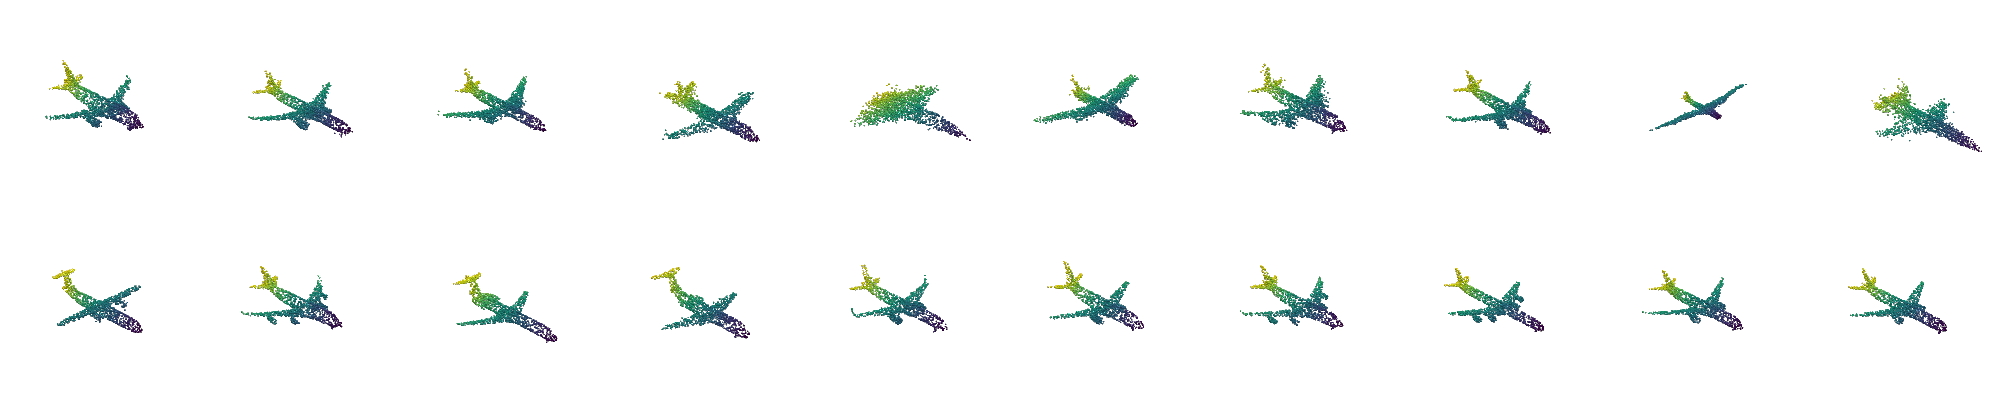

################################################################################
###  VAE
################################################################################


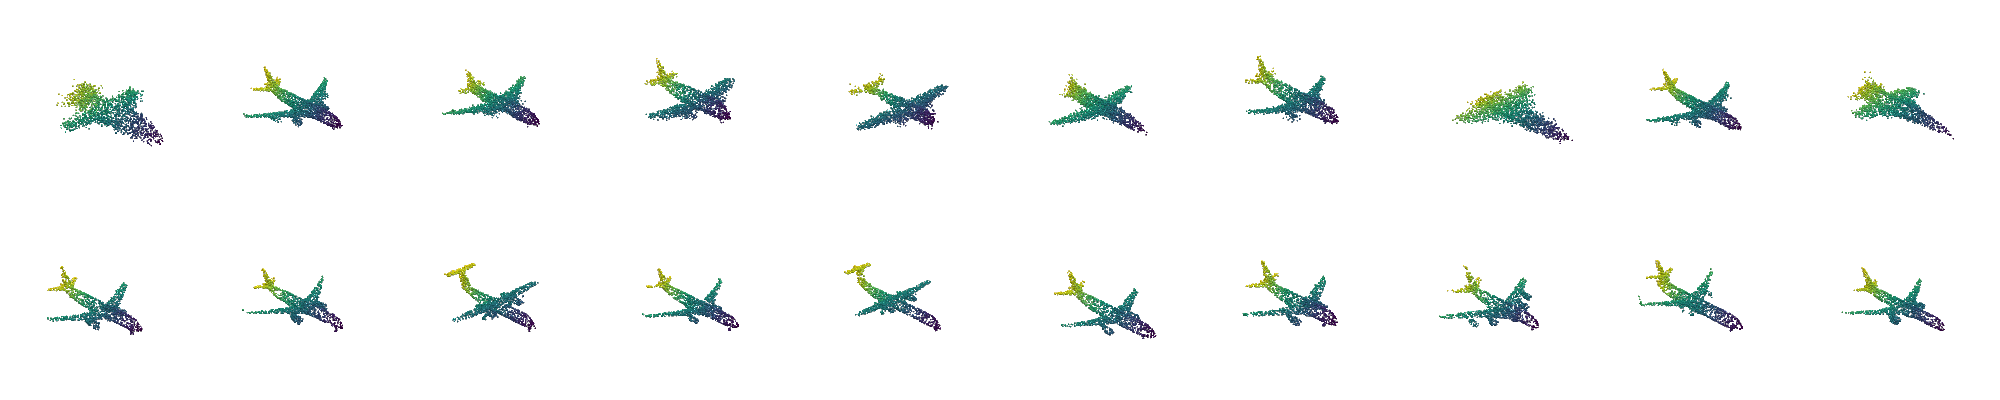

In [49]:
for model in models: 
    print(80*"#")
    print(f"###  {model}")
    print(80*"#")
    sample_pcs = torch.load(RESULTS + f"{model}"+'/samples_airplane.pt')
    ref_pcs = torch.load(RESULTS + f"{model}"+'/ref_airplane.pt')
    plot_pcs(sample_pcs,ref_pcs)

# Car 

################################################################################
###  PointFlow
################################################################################


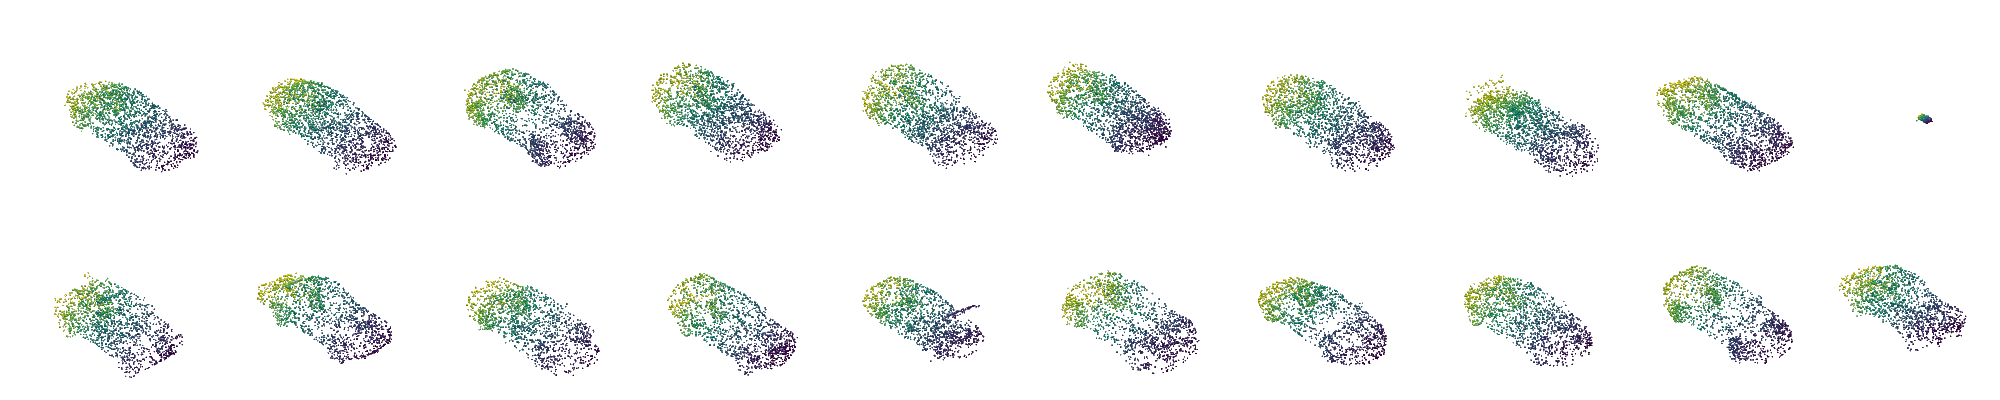

################################################################################
###  VAE
################################################################################


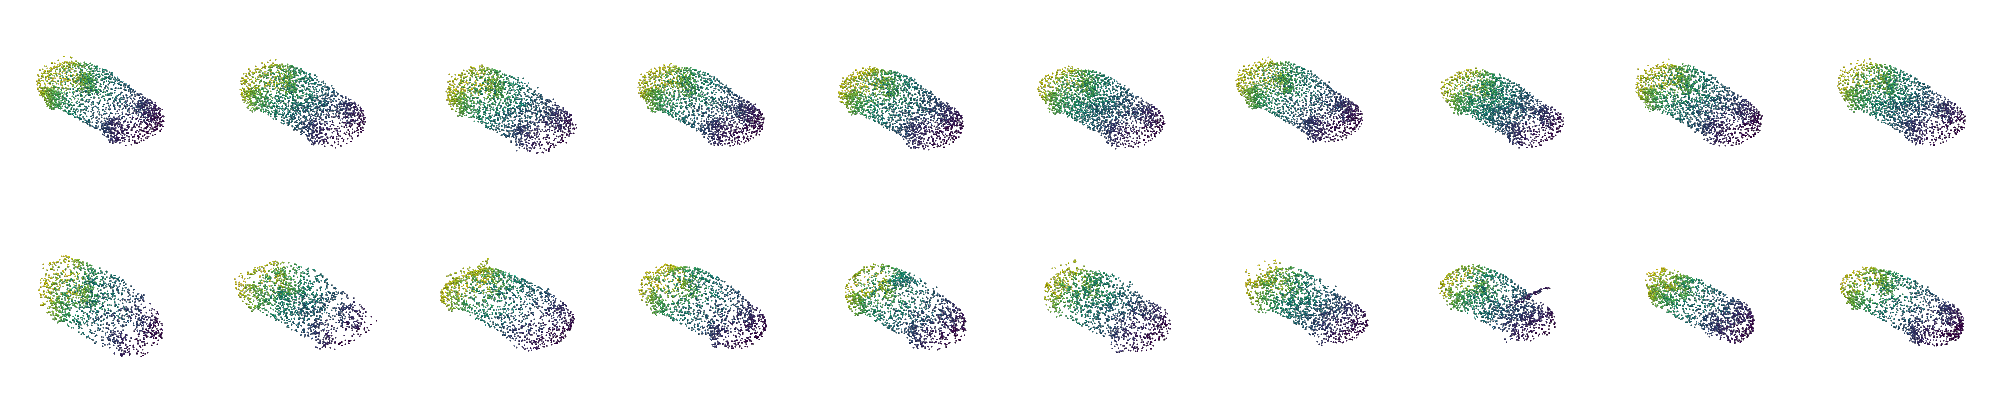

In [50]:
for model in models: 
    print(80*"#")
    print(f"###  {model}")
    print(80*"#")
    sample_pcs = torch.load(RESULTS + f"{model}"+'/samples_car.pt')
    ref_pcs = torch.load(RESULTS + f"{model}"+'/ref_car.pt')
    plot_pcs(sample_pcs,ref_pcs)

# Chair

################################################################################
###  PointFlow
################################################################################


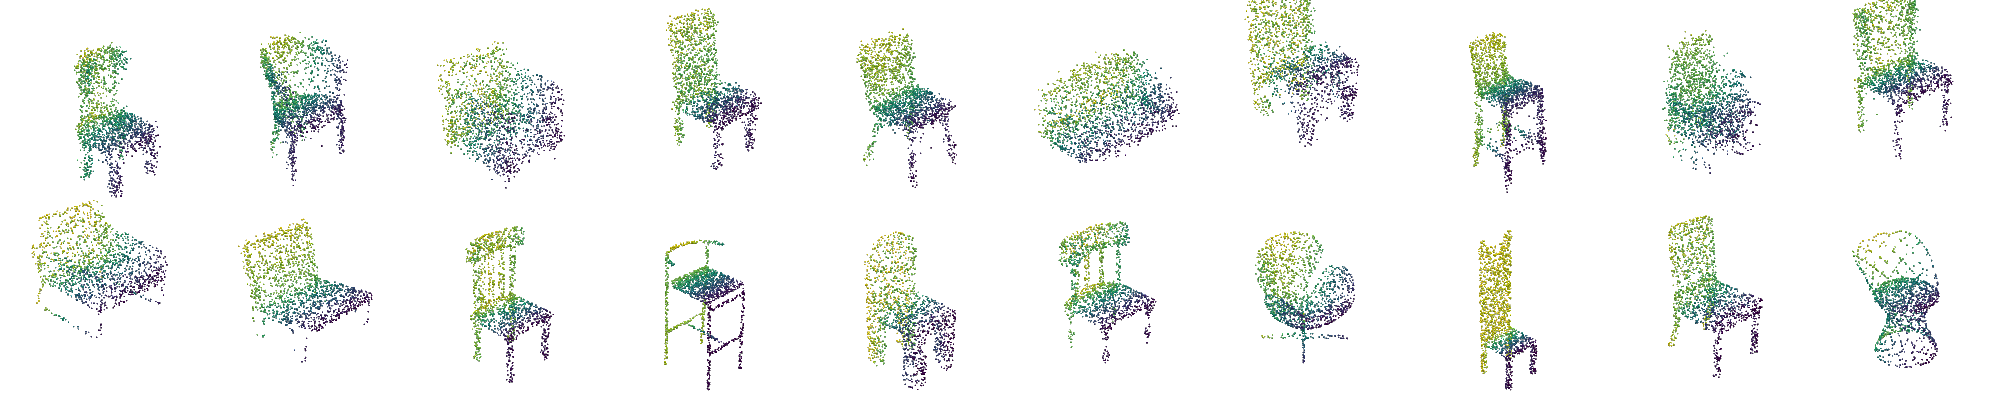

################################################################################
###  VAE
################################################################################


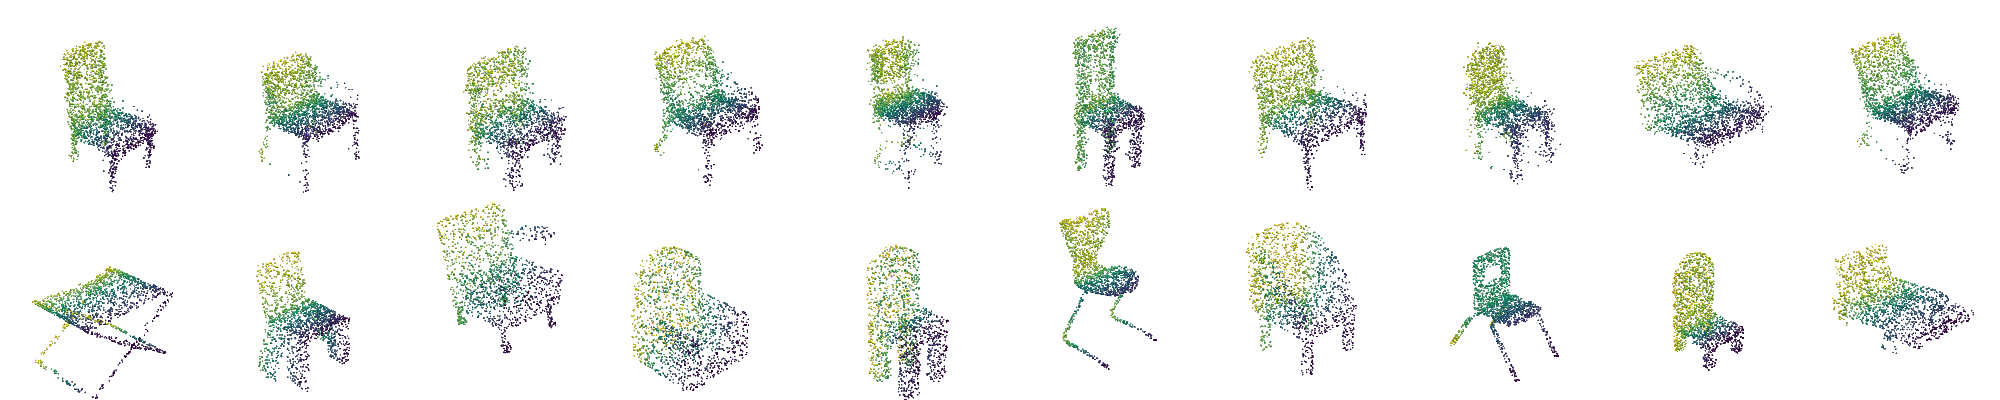

In [51]:
for model in models: 
    print(80*"#")
    print(f"###  {model}")
    print(80*"#")
    sample_pcs = torch.load(RESULTS + f"{model}"+'/samples_chair.pt')
    ref_pcs = torch.load(RESULTS + f"{model}"+'/ref_chair.pt')
    plot_pcs(sample_pcs,ref_pcs)
